In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

COVID_data = pd.read_csv('../raw_data/statewide-covid-19-cases-deaths-tests.csv')

COVID_df = pd.DataFrame(COVID_data, columns = ['date', 'area', 'cases', 'deaths'])
Pop_df = pd.DataFrame(COVID_data, columns = ['area','population'])

In [2]:
COVID_df['Date'] = pd.to_datetime(COVID_df['date'])
COVID_df['Date'] = COVID_df['Date'].dt.strftime('%Y-%m')


COVID_df['cases_rate'] = COVID_df.cases/Pop_df.population
COVID_df['death_rate'] = COVID_df.deaths/Pop_df.population

COVID_time_df = COVID_df.groupby(by=[COVID_df.Date, COVID_df.area], as_index = False).sum()

COVID_time_df.rename(columns = {'area':'county'},inplace = True)
COVID_time_df['Date'] = pd.to_datetime(COVID_time_df['Date'], format='%Y-%m')
COVID_time_df['Date'] = COVID_time_df['Date'].dt.to_period(freq='M')

COVID_time_df['county'] = COVID_time_df['county'] + ' County'

COVID_time_df

,Date,county,cases,deaths,cases_rate,death_rate
0,2020-02,Alameda County,16.0,0.0,0.000009,0.000000
1,2020-02,Alpine County,0.0,0.0,0.000000,0.000000
2,2020-02,Amador County,0.0,0.0,0.000000,0.000000
3,2020-02,Butte County,0.0,0.0,0.000000,0.000000
4,2020-02,Calaveras County,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
1520,2022-02,Tuolumne County,616.0,4.0,0.011767,0.000076
1521,2022-02,Unknown County,837.0,0.0,0.000000,0.000000
1522,2022-02,Ventura County,4730.0,52.0,0.005547,0.000061
1523,2022-02,Yolo County,1462.0,4.0,0.006538,0.000018


In [3]:
COVID_VAC_data = pd.read_csv('../raw_data/covid-19-vaccines-administered-by-demographics-by-county.csv')

COVID_VAC_df = pd.DataFrame(COVID_VAC_data, columns = ['county','administered_date','fully_vaccinated'])

Pop_df = pd.DataFrame(COVID_data, columns = ['area','population'])
Pop_group_df = Pop_df.groupby(by=[Pop_df.area]).max()

COVID_VAC_df['year'] = pd.DatetimeIndex(COVID_VAC_df['administered_date']).year
COVID_VAC_df['month'] = pd.DatetimeIndex(COVID_VAC_df['administered_date']).month

for idx, row in Pop_group_df.iterrows():
    COVID_VAC_df.loc[COVID_VAC_df['county'] == idx, 'fully_vaccinated_rate'] = COVID_VAC_df.loc[COVID_VAC_df['county'] == idx, 'fully_vaccinated']/row.population

COVID_VAC_time_df = COVID_VAC_df.groupby(by=[COVID_VAC_df.year,COVID_VAC_df.month , COVID_VAC_df.county], as_index = False).sum()

COVID_VAC_time_df['county'] = COVID_VAC_time_df['county'] + ' County'

COVID_VAC_time_df

,year,month,county,fully_vaccinated,fully_vaccinated_rate
0,2020,1,Alameda County,0.0,0.000000
1,2020,1,Alpine County,0.0,0.000000
2,2020,1,Amador County,0.0,0.000000
3,2020,1,Butte County,0.0,0.000000
4,2020,1,Calaveras County,0.0,0.000000
...,...,...,...,...,...
1234,2022,2,Tulare County,14451.0,0.029831
1235,2022,2,Tuolumne County,486.0,0.009283
1236,2022,2,Ventura County,21416.0,0.025114
1237,2022,2,Yolo County,5316.0,0.023773


In [4]:
COVID_VAC_time_df = COVID_VAC_time_df.astype({'year':'string','month':'string'})
COVID_VAC_time_df['Date'] = COVID_VAC_time_df['year']+'-'+COVID_VAC_time_df['month']
COVID_VAC_time_df = COVID_VAC_time_df.drop(columns = ['year','month'])
COVID_VAC_time_df

,county,fully_vaccinated,fully_vaccinated_rate,Date
0,Alameda County,0.0,0.000000,2020-1
1,Alpine County,0.0,0.000000,2020-1
2,Amador County,0.0,0.000000,2020-1
3,Butte County,0.0,0.000000,2020-1
4,Calaveras County,0.0,0.000000,2020-1
...,...,...,...,...
1234,Tulare County,14451.0,0.029831,2022-2
1235,Tuolumne County,486.0,0.009283,2022-2
1236,Ventura County,21416.0,0.025114,2022-2
1237,Yolo County,5316.0,0.023773,2022-2


In [5]:
COVID_VAC_time_df['Date'] = pd.to_datetime(COVID_VAC_time_df['Date'], format='%Y-%m')
COVID_VAC_time_df['Date'] = COVID_VAC_time_df['Date'].dt.to_period(freq='M')

COVID_VAC_time_df

,county,fully_vaccinated,fully_vaccinated_rate,Date
0,Alameda County,0.0,0.000000,2020-01
1,Alpine County,0.0,0.000000,2020-01
2,Amador County,0.0,0.000000,2020-01
3,Butte County,0.0,0.000000,2020-01
4,Calaveras County,0.0,0.000000,2020-01
...,...,...,...,...
1234,Tulare County,14451.0,0.029831,2022-02
1235,Tuolumne County,486.0,0.009283,2022-02
1236,Ventura County,21416.0,0.025114,2022-02
1237,Yolo County,5316.0,0.023773,2022-02


In [6]:
COVID_VAC_time_df.loc[50:60]

,county,fully_vaccinated,fully_vaccinated_rate,Date
50,Statewide County,3.0,0.000000,2020-01
51,Sutter County,0.0,0.000000,2020-01
52,Tehama County,0.0,0.000000,2020-01
53,Trinity County,0.0,0.000000,2020-01
54,Tulare County,0.0,0.000000,2020-01
55,Tuolumne County,0.0,0.000000,2020-01
56,Ventura County,0.0,0.000000,2020-01
57,Yolo County,0.0,0.000000,2020-01
58,Yuba County,0.0,0.000000,2020-01
59,Alameda County,3.0,0.000002,2020-07


In [7]:
Housing_Inv_Data = pd.read_csv('../raw_data/RDC_Inventory_Core_Metrics_County_History.csv')
Housing_Inv_Data = Housing_Inv_Data.drop(Housing_Inv_Data.tail(1).index)

HI_df = pd.DataFrame(Housing_Inv_Data, columns = ['month_date_yyyymm', 'county_name', 'active_listing_count'])
HI_df = HI_df[HI_df['county_name'].str.contains(', ca')]

HI_df = HI_df.astype({'month_date_yyyymm':'string'})
HI_df = HI_df[(HI_df['month_date_yyyymm'] >= '201801') & (HI_df['month_date_yyyymm'] < '202201') ]

HI_df['county_name'] = HI_df['county_name'].str.split(',',expand = True)[0]
HI_df['county_name'] = HI_df['county_name'].str.title()
HI_df['county_name'] = HI_df['county_name'] + ' County'

HI_df['month_date_yyyymm'] = HI_df['month_date_yyyymm'].str.replace(r'(\d{4})(\d{2})',r'\1-\2')
HI_df['month_date_yyyymm'] = pd.to_datetime(HI_df['month_date_yyyymm'], format='%Y-%m')
HI_df['month_date_yyyymm'] = HI_df['month_date_yyyymm'].dt.to_period(freq='M')

HI_df.rename(columns = {'month_date_yyyymm':'Date','county_name':'County','active_listing_count':'Housing Inventory'},inplace = True)
HI_df

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-7-f9ec3413907e>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  HI_df['month_date_yyyymm'] = HI_df['month_date_yyyymm'].str.replace(r'(\d{4})(\d{2})',r'\1-\2')


,Date,County,Housing Inventory
9318,2021-12,Modoc County,43.0
9348,2021-12,Ventura County,456.0
9445,2021-12,Riverside County,2483.0
9446,2021-12,Kern County,1039.0
9456,2021-12,Contra Costa County,563.0
...,...,...,...
157781,2018-01,Monterey County,590.0
157813,2018-01,Santa Barbara County,1045.0
157956,2018-01,Trinity County,199.0
157988,2018-01,Sierra County,36.0


In [8]:
housing_price = pd.read_excel(r'../raw_data/housing_price_by_county_by_month.xlsx')
housing_price = housing_price.melt(id_vars=["RegionName", "State"], var_name="Date", value_name="Price")
housing_price["Date"] = housing_price['Date'].dt.to_period('M')

# For housing inventory, convert date to time period and join
price_and_inventory = pd.merge(housing_price, HI_df, how = 'left', left_on = ['RegionName','Date'], right_on = ['County', 'Date']) 

# For unemployment rate, convert string to time series to time period and join
unemployment_rate = pd.read_excel(r'../raw_data/unemployment_rate_by_county_by_month.xlsx')
unemployment_rate['Date'] = pd.to_datetime(unemployment_rate['Date'], format='%Y-%m')
unemployment_rate['Date'] = unemployment_rate['Date'].dt.to_period(freq='M')
price_and_inventory_and_unemployment = price_and_inventory.merge(unemployment_rate, how='left', left_on=['RegionName', 'Date'], right_on=['RegionName', 'Date'])

#This is the index column from the unemployment table
price_and_inventory_and_unemployment = price_and_inventory_and_unemployment.drop(columns='Unnamed: 0')

#Adding covid data
adding_covid = price_and_inventory_and_unemployment.merge(COVID_time_df,how = 'left', left_on = ['RegionName', 'Date'], right_on = ['county','Date'])

#Adding covid data
adding_vacc = adding_covid.merge(COVID_VAC_time_df,how = 'left', left_on = ['RegionName', 'Date'], right_on = ['county','Date'])

final_df = adding_vacc
final_df.loc[1800:1820]

,RegionName,State_x,Date,Price,County,Housing Inventory,State_y,UnemploymentRate,county_x,cases,deaths,cases_rate,death_rate,county_y,fully_vaccinated,fully_vaccinated_rate
1800,Orange County,CA,2020-08,772572.0,Orange County,4368.0,CA,10.7,Orange County,6930.0,370.0,0.002146,0.000115,Orange County,18.0,0.000006
1801,Riverside County,CA,2020-08,416115.0,Riverside County,4000.0,CA,11.6,Riverside County,8709.0,286.0,0.003529,0.000116,Riverside County,9.0,0.000004
1802,San Bernardino County,CA,2020-08,375819.0,San Bernardino County,2942.0,CA,11.3,San Bernardino County,9369.0,291.0,0.004225,0.000131,San Bernardino County,3.0,0.000001
1803,Santa Clara County,CA,2020-08,1274282.0,Santa Clara County,1663.0,CA,8.1,Santa Clara County,5900.0,60.0,0.002999,0.000030,Santa Clara County,12.0,0.000006
1804,Alameda County,CA,2020-08,917758.0,Alameda County,1458.0,CA,10.6,Alameda County,5351.0,99.0,0.003174,0.000059,Alameda County,6.0,0.000004
1805,Sacramento County,CA,2020-08,406837.0,Sacramento County,1358.0,CA,10.9,Sacramento County,5929.0,184.0,0.003781,0.000117,Sacramento County,21.0,0.000013
1806,Contra Costa County,CA,2020-08,715994.0,Contra Costa County,1263.0,CA,10.5,Contra Costa County,4371.0,64.0,0.003768,0.000055,Contra Costa County,29.0,0.000025
1807,Fresno County,CA,2020-08,284047.0,Fresno County,799.0,CA,11.5,Fresno County,6184.0,169.0,0.005991,0.000164,Fresno County,0.0,0.000000
1808,Kern County,CA,2020-08,245383.0,Kern County,1266.0,CA,13.0,Kern County,5059.0,151.0,0.005456,0.000163,Kern County,0.0,0.000000
1809,Ventura County,CA,2020-08,634426.0,Ventura County,1013.0,CA,9.8,Ventura County,2668.0,41.0,0.003129,0.000048,Ventura County,6.0,0.000007


In [9]:
final_df = final_df.drop(columns=['County', 'State_y','county_y','county_x'])
final_df

,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,deaths,cases_rate,death_rate,fully_vaccinated,fully_vaccinated_rate
0,Los Angeles County,CA,2018-01,607070.0,9337.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN
1,San Diego County,CA,2018-01,574762.0,4367.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,Orange County,CA,2018-01,722234.0,3839.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN
3,Riverside County,CA,2018-01,366823.0,7581.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN
4,San Bernardino County,CA,2018-01,330742.0,5844.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,Mono County,CA,2022-02,611957.0,NaN,NaN,67.0,0.0,0.004799,0.0,168.0,0.012034
2896,Trinity County,CA,2022-02,357120.0,NaN,NaN,38.0,0.0,0.002846,0.0,206.0,0.015426
2897,Modoc County,CA,2022-02,167741.0,NaN,NaN,47.0,0.0,0.004960,0.0,86.0,0.009077
2898,Sierra County,CA,2022-02,325125.0,NaN,NaN,3.0,0.0,0.000963,0.0,24.0,0.007705


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
final_df.describe()

,Price,Housing Inventory,UnemploymentRate,cases,deaths,cases_rate,death_rate,fully_vaccinated,fully_vaccinated_rate
count,2.864000e+03,2784.000000,2784.000000,1450.000000,1450.000000,1450.000000,1450.000000,1.218000e+03,1218.000000
mean,5.013036e+05,1061.126796,6.842098,5745.704828,57.388276,0.007171,0.000065,6.757416e+04,0.085925
std,3.118764e+05,1995.551994,3.755469,30289.435328,284.703098,0.010897,0.000099,2.610701e+05,0.123309
min,1.332370e+05,11.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.825805e+05,177.750000,4.100000,100.500000,1.000000,0.001107,0.000002,6.000000e+00,0.000021
50%,3.871370e+05,422.000000,6.000000,647.500000,6.000000,0.003377,0.000031,3.334500e+03,0.043715
75%,6.316625e+05,940.250000,8.300000,2870.750000,31.000000,0.008271,0.000078,3.365300e+04,0.094678
max,1.714455e+06,16557.000000,28.600000,852936.000000,7631.000000,0.083152,0.000871,4.904275e+06,0.707252


In [12]:
#missing values
missing_values_percent_per_col = (final_df.isna().sum().sort_values(ascending = False) / len(final_df)) * 100
missing_values_percent_per_col

fully_vaccinated         58.000000
fully_vaccinated_rate    58.000000
cases                    50.000000
deaths                   50.000000
cases_rate               50.000000
death_rate               50.000000
Housing Inventory         4.000000
UnemploymentRate          4.000000
Price                     1.241379
RegionName                0.000000
State_x                   0.000000
Date                      0.000000
dtype: float64

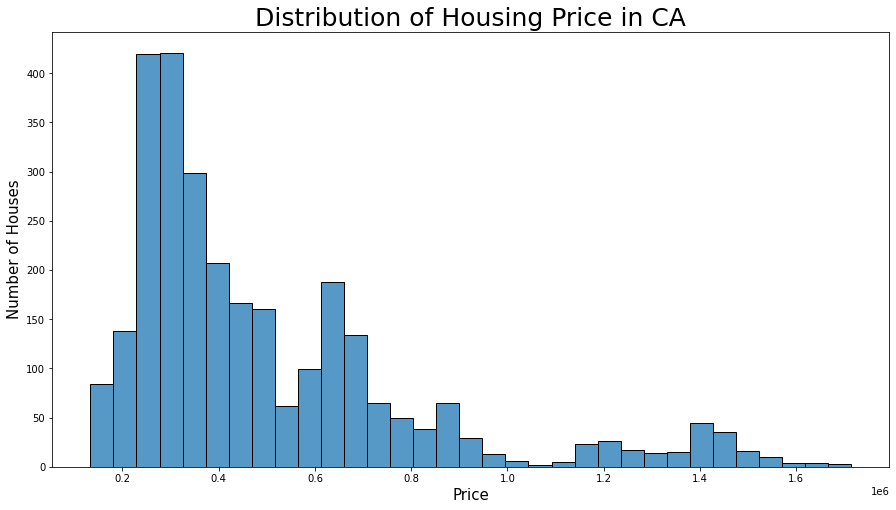

In [13]:
Price = final_df.Price
plt.figure(figsize=(15,8))
sns.histplot(Price)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Number of Houses', fontsize=15)
plt.title('Distribution of Housing Price in CA', fontsize = 25)
plt.show()

In [14]:
Price[Price>1600000]

2507    1614271.0
2565    1630534.0
2623    1646929.0
2681    1660895.0
2739    1675408.0
2797    1694447.0
2847    1635654.0
2855    1714455.0
Name: Price, dtype: float64

## Recalculate Vaccination Data

In [15]:
display(final_df.loc[2000:2020, :])
final_df.loc[~final_df['fully_vaccinated'].isnull(), 'fully_vaccinated'] = final_df.loc[~final_df['fully_vaccinated'].isnull(), \
                                                                                        'fully_vaccinated'].apply(lambda x: int(x/3))
final_df.loc[~final_df['fully_vaccinated_rate'].isnull(), 'fully_vaccinated_rate'] = final_df.loc[~final_df['fully_vaccinated_rate'].isnull(), \
                                                                                        'fully_vaccinated_rate'] / 3
display(final_df.loc[2000:2020, :])


,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,deaths,cases_rate,death_rate,fully_vaccinated,fully_vaccinated_rate
2000,El Dorado County,CA,2020-11,525980.0,491.0,5.7,1691.0,3.0,0.008757,0.000016,3.0,0.000016
2001,Shasta County,CA,2020-11,304698.0,443.0,6.5,3353.0,25.0,0.018845,0.000141,33.0,0.000185
2002,Imperial County,CA,2020-11,249591.0,83.0,16.4,3776.0,36.0,0.019703,0.000188,0.0,0.000000
2003,Kings County,CA,2020-11,260360.0,175.0,8.8,3119.0,8.0,0.019937,0.000051,0.0,0.000000
2004,Madera County,CA,2020-11,311143.0,378.0,7.9,1794.0,11.0,0.011206,0.000069,0.0,0.000000
2005,Napa County,CA,2020-11,744631.0,311.0,6.4,1433.0,3.0,0.010261,0.000021,3.0,0.000021
2006,Humboldt County,CA,2020-11,348459.0,178.0,6.2,444.0,0.0,0.003311,0.000000,0.0,0.000000
2007,Nevada County,CA,2020-11,533022.0,487.0,5.7,974.0,7.0,0.009867,0.000071,0.0,0.000000
2008,Sutter County,CA,2020-11,346309.0,99.0,8.0,2043.0,9.0,0.019320,0.000085,0.0,0.000000
2009,Mendocino County,CA,2020-11,445598.0,202.0,6.7,528.0,2.0,0.005970,0.000023,0.0,0.000000


,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,deaths,cases_rate,death_rate,fully_vaccinated,fully_vaccinated_rate
2000,El Dorado County,CA,2020-11,525980.0,491.0,5.7,1691.0,3.0,0.008757,0.000016,1.0,0.000005
2001,Shasta County,CA,2020-11,304698.0,443.0,6.5,3353.0,25.0,0.018845,0.000141,11.0,0.000062
2002,Imperial County,CA,2020-11,249591.0,83.0,16.4,3776.0,36.0,0.019703,0.000188,0.0,0.000000
2003,Kings County,CA,2020-11,260360.0,175.0,8.8,3119.0,8.0,0.019937,0.000051,0.0,0.000000
2004,Madera County,CA,2020-11,311143.0,378.0,7.9,1794.0,11.0,0.011206,0.000069,0.0,0.000000
2005,Napa County,CA,2020-11,744631.0,311.0,6.4,1433.0,3.0,0.010261,0.000021,1.0,0.000007
2006,Humboldt County,CA,2020-11,348459.0,178.0,6.2,444.0,0.0,0.003311,0.000000,0.0,0.000000
2007,Nevada County,CA,2020-11,533022.0,487.0,5.7,974.0,7.0,0.009867,0.000071,0.0,0.000000
2008,Sutter County,CA,2020-11,346309.0,99.0,8.0,2043.0,9.0,0.019320,0.000085,0.0,0.000000
2009,Mendocino County,CA,2020-11,445598.0,202.0,6.7,528.0,2.0,0.005970,0.000023,0.0,0.000000


In [24]:
final_df.groupby('RegionName').agg({'fully_vaccinated_rate':'sum'}).sort_values(by = 'fully_vaccinated_rate')

,fully_vaccinated_rate
RegionName,
Lassen County,0.276124
Modoc County,0.401548
Mariposa County,0.411576
Kings County,0.426438
Tehama County,0.432349
Trinity County,0.443138
Shasta County,0.454367
Del Norte County,0.460338
Siskiyou County,0.465716


## Delete Wrong Data and Divide Data into Three Parts

Data of cases, deaths, cases_rate, and death_rate begins from 2020-02

Data of vaccination begins from 2020-07

In [16]:
final_df.head()

,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,deaths,cases_rate,death_rate,fully_vaccinated,fully_vaccinated_rate
0,Los Angeles County,CA,2018-01,607070.0,9337.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN
1,San Diego County,CA,2018-01,574762.0,4367.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,Orange County,CA,2018-01,722234.0,3839.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN
3,Riverside County,CA,2018-01,366823.0,7581.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN
4,San Bernardino County,CA,2018-01,330742.0,5844.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
final_df.loc[final_df['Date'] < '2020-02', 'fully_vaccinated'] = np.nan
final_df.loc[final_df['Date'] < '2020-02', 'fully_vaccinated_rate'] = np.nan
df_part1 = final_df[final_df['Date'] < '2020-02']
df_part2 = final_df[(final_df['Date'] >= '2020-02') & (final_df['Date'] < '2020-07')]
df_part3 = final_df[final_df['Date'] >= '2020-07']
df_all = final_df.copy()


## Housing Price Distribution

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

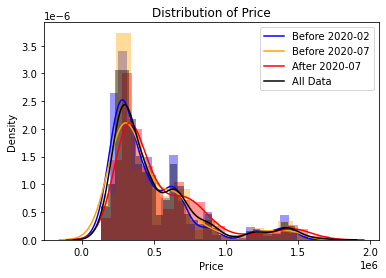

In [67]:
def plot_distribution(df_list, column_name):
    color_list = ['blue','orange','red','black','grey','pink']
    color_list = color_list[0:len(df_list)]
    for df, color in zip(df_list, color_list):
        sns.distplot(df[column_name], color = color)
        plt.legend(labels=['Before 2020-02','Before 2020-07','After 2020-07','All Data'])
    plt.title('Distribution of ' + column_name)
    plt.savefig('../figures/Distribution_' + column_name)
    plt.show()

df_list = [df_part1, df_part2, df_part3, df_all]
column_name = 'Price'
plot_distribution(df_list, column_name)

<Strong>Findings</Strong>:

In general, housing prices increase after COVID-19

## Housing Inventory Distribution

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

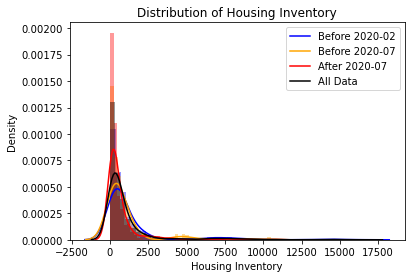

In [68]:
df_list = [df_part1, df_part2, df_part3, df_all]
column_name = 'Housing Inventory'
plot_distribution(df_list, column_name)

<Strong>Findings</Strong>:

In general, housing inventory decrease after COVID-19, especially during the beginning of vaccination.

## Unemployment Rate Distribution

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

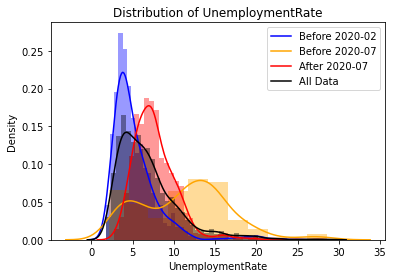

In [69]:
df_list = [df_part1, df_part2, df_part3, df_all]
column_name = 'UnemploymentRate'
plot_distribution(df_list, column_name)

<Strong>Findings</Strong>:

Unemployment rate grows severely after the outbreak of COVID, but drops down after vaccination. However, the unemployment rate is still higher comparing to 2018-2019

## Change of Housing Price

In [22]:
df_all.head()

,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,deaths,cases_rate,death_rate,fully_vaccinated,fully_vaccinated_rate
0,Los Angeles County,CA,2018-01,607070.0,9337.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN
1,San Diego County,CA,2018-01,574762.0,4367.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,Orange County,CA,2018-01,722234.0,3839.0,3.3,NaN,NaN,NaN,NaN,NaN,NaN
3,Riverside County,CA,2018-01,366823.0,7581.0,4.8,NaN,NaN,NaN,NaN,NaN,NaN
4,San Bernardino County,CA,2018-01,330742.0,5844.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN


select top k counties in CA

Comparing prices of all counties during '2018-01', and select counties of top k values

In [23]:
def top_k_counties(df_all, k):
    df = df_all[df_all['Date'] == '2018-01'].sort_values(by = 'Price', axis = 0, ascending = False)
    top_k_counties = list(df.RegionName)[0 : k]
    return top_k_counties
top_k_county_list = top_k_counties(df_all, 5)
top_k_county_list

['San Mateo County',
 'San Francisco County',
 'Santa Clara County',
 'Marin County',
 'Alameda County']

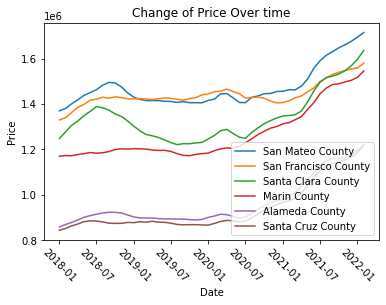

In [78]:
def change_over_time(df_all, k, column_name):
    top_k_county_list = top_k_counties(df_all, k)
    for county in top_k_county_list:
        df_county = df_all[df_all['RegionName'] == county].copy()
        df_county.loc[:, 'Date'] = df_county.loc[:, 'Date'].astype("string")
        df_county.loc[:, 'Date'] = df_county.loc[:, 'Date'].astype("datetime64[ns]")
        sns.lineplot(data = df_county, x = 'Date', y = column_name)
        plt.legend(labels = top_k_county_list)
    plt.title('Change of ' + column_name + ' Over time')
    plt.xticks(rotation = -45)
    plt.savefig('../figures/Trend_' + column_name)
    plt.show()

column_name = 'Price'
k = 6
change_over_time(df_all, k, column_name)

## Change of Housing Inventory Over Time

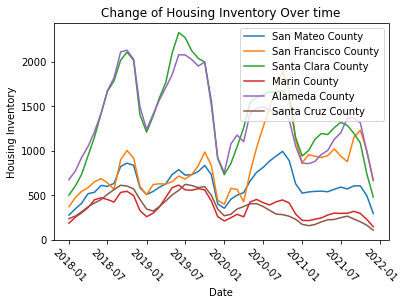

In [79]:
column_name = 'Housing Inventory'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

Housing inventory dropped first but increased afterward.

## Change of Unemployment Rate Over Time

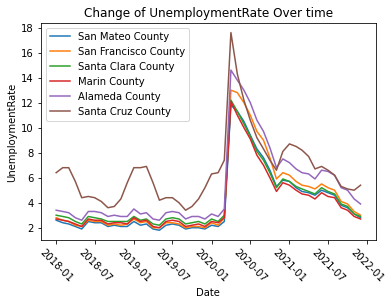

In [80]:
column_name = 'UnemploymentRate'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

Unemployment rate increased first but dropped gradually after that.

## Change of Cases Over Time

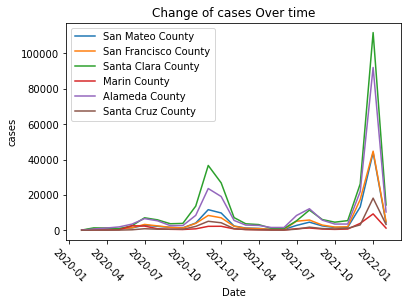

In [81]:
column_name = 'cases'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

There's a peak of the number of cases in the beginning of 2022. The number of cases during that period was even greater than the number of cases during 2021.

## Change of Cases Rate Over Time

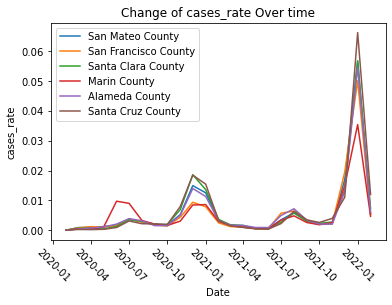

In [82]:
column_name = 'cases_rate'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

Similar to the trend of cases.

## Change of Deaths Over Time

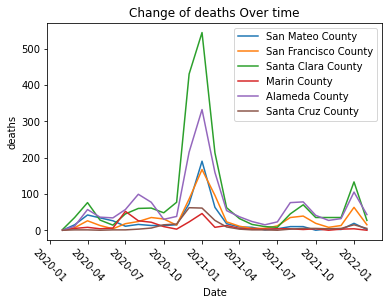

In [83]:
column_name = 'deaths'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

The peak is different from that of 'cases'.

## Change of Death Rate Over Time

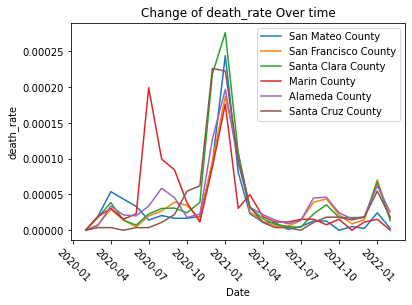

In [84]:
column_name = 'death_rate'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

Similar to deaths

## Change of Fully Vaccinated Over Time

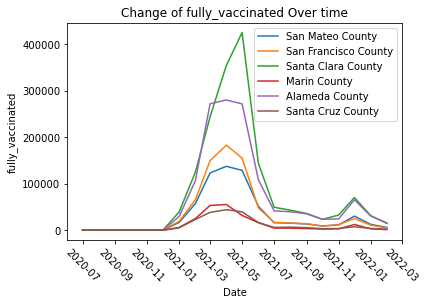

In [85]:
column_name = 'fully_vaccinated'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

Follows the trend of deaths

## Change of Fully Vaccinated Rate Over Time

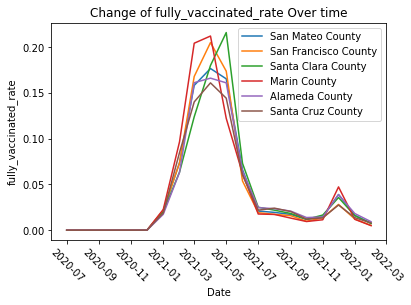

In [86]:
column_name = 'fully_vaccinated_rate'
k = 6
change_over_time(df_all, k, column_name)

<Strong>Findings</Strong>:

Fully vaccinated rates are similar between states.

## Heatmap of correlation between features

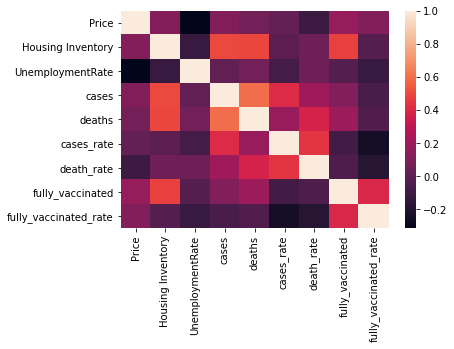

In [33]:
sns.heatmap(df_all.iloc[:, 3:].corr())
plt.show()

<Strong>Findings</Strong>:

There is no strong correlation between the dependent variable and any independent variables, but there are strong correlations(>0.5) between independent variables.

## Filling missing values

In [34]:
df_before = df_part1.copy()

In [35]:
df_after = pd.concat([df_part2, df_part3])
print('shape of df_part2: ', df_part2.shape)
print('shape of df_part3: ', df_part3.shape)
print('shape of df_after: ', df_after.shape)

shape of df_part2:  (290, 12)
shape of df_part3:  (1160, 12)
shape of df_after:  (1450, 12)


In [36]:
df_after.loc[df_after['fully_vaccinated'].isnull(), 'fully_vaccinated'] = 0
df_after.loc[df_after['fully_vaccinated_rate'].isnull(), 'fully_vaccinated_rate'] = 0
df_after.head()

,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,deaths,cases_rate,death_rate,fully_vaccinated,fully_vaccinated_rate
1450,Los Angeles County,CA,2020-02,652904.0,9084.0,4.3,105.0,0.0,0.000010,0.000000e+00,0.0,0.0
1451,San Diego County,CA,2020-02,611465.0,4092.0,3.2,16.0,0.0,0.000005,0.000000e+00,0.0,0.0
1452,Orange County,CA,2020-02,755993.0,3975.0,2.8,56.0,0.0,0.000017,0.000000e+00,0.0,0.0
1453,Riverside County,CA,2020-02,402564.0,6674.0,4.0,15.0,0.0,0.000006,0.000000e+00,0.0,0.0
1454,San Bernardino County,CA,2020-02,363191.0,5078.0,3.7,23.0,1.0,0.000010,4.509790e-07,0.0,0.0


## Export Dataframes

In [37]:
df_part1.to_csv('../raw_data/df_part1.csv')
df_part2.to_csv('../raw_data/df_part2.csv')
df_part3.to_csv('../raw_data/df_part3.csv')
df_before.to_csv('../raw_data/df_before.csv')
df_after.to_csv('../raw_data/df_after.csv')


In [38]:
df_all.to_csv('../time_series_analysis/df_all_time.csv')

# Summary of Data Preprocessing

<Strong>Notes:</Strong>
<li>We use a new source for housing inventory data that doesn't have missing value</li>
<li>The format of covid data has been changed</li>
<li>There's a problem in the calculation of vaccination data. We have re-calculated the two features.</li>
<li>There was vaccination data on 2020-01. The wrong data has been dropped.</li>
<li>The vaccination data from 2020-02 to 2020-06 are filled with 0</li>


<Strong>Exploration:</Strong>

The graphs and tables can be seen in this notebook.

<Strong>Output</Strong>:

First, transformed the covid data into needed value and merged all dataframes together.

Next, the data is seperated into three different parts:
<li>df_part1 contains data from 2018-01 - 2020-01, and has no data regarding cases, deaths, and vaccination. It can be described as 'data before COVID-19'.</li>
<li>df_part2 contains data from 2020-02 - 2020-06. It has data about cases, deaths, but doesn't have data regarding vaccination. It can be dscribed as 'early state of COVID-19'.</li>
<li>df_part1 contains data from 2020-01 - 2021-12, and has all data about cases, deaths, and vaccination. It can be dscribed as 'later state of COVID-19'.</li>
The dataframes are also exported to csv as 'df_part1.csv', 'df_part2.csv', 'df_part3.csv'

Then, for the convenience of model-building, the later 2 dataframes can be concatenated together, and all missing values(about vaccinnation) are filled with 0. So the whole dataframe is divided into 2 parts:
<li>df_before for data before COVID-19.</li>
<li>And df_after for data after COVID-19.</li>
The dataframes are also exported to csv as 'df_before.csv', 'df_after.csv'



## Exploratory Data Analysis - Part 2

In [40]:
df_after_new = pd.read_csv('../raw_data/df_after_new.csv')
print(df_after_new.shape)
df_after_new.head()

(1323, 17)


,Unnamed: 0,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,cases_rate,deaths,death_rate,fully_vaccinated,fully_vaccinated_rate,Population,Area,GDP,GDPpp
0,0,Los Angeles County,CA,2020-02,652904.0,9084.0,4.3,105.0,0.000010,0.0,0.000000e+00,0.0,0.0,9829544,4060,662418536,67.390566
1,1,San Diego County,CA,2020-02,611465.0,4092.0,3.2,16.0,0.000005,0.0,0.000000e+00,0.0,0.0,3286069,4204,203932550,62.059729
2,2,Orange County,CA,2020-02,755993.0,3975.0,2.8,56.0,0.000017,0.0,0.000000e+00,0.0,0.0,3167809,948,220075102,69.472339
3,3,Riverside County,CA,2020-02,402564.0,6674.0,4.0,15.0,0.000006,0.0,0.000000e+00,0.0,0.0,2458395,7208,75327830,30.641061
4,4,San Bernardino County,CA,2020-02,363191.0,5078.0,3.7,23.0,0.000010,1.0,4.509790e-07,0.0,0.0,2194710,20062,78146465,35.606738


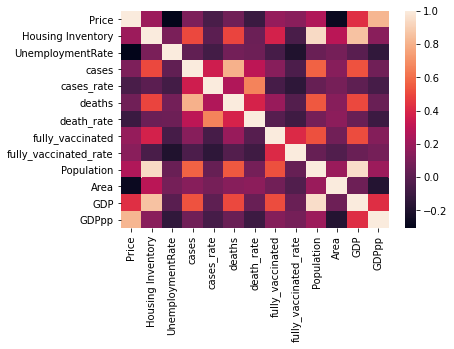

In [88]:
sns.heatmap(df_after_new.iloc[:, 4:].corr())
plt.savefig('../figures/Heatmap_New')

In [58]:
def plot_unique_value_distribution(df, column_name):
    unique_values = df[column_name].unique()
    sns.distplot(unique_values)
    plt.title('Distribution of ' + column_name)
    plt.show()

<AxesSubplot:xlabel='Population'>

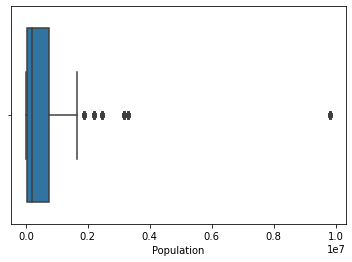

In [65]:
sns.boxplot(x = df_after_new['Population'])

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


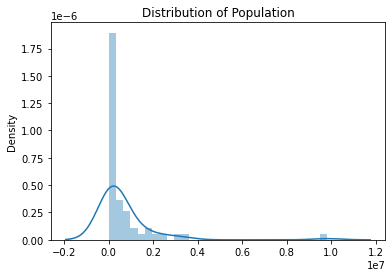

In [60]:
column_name = 'Population'
plot_unique_value_distribution(df_after_new, column_name)

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


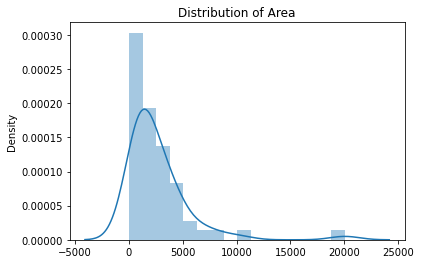

In [61]:
column_name = 'Area'
plot_unique_value_distribution(df_after_new, column_name)

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


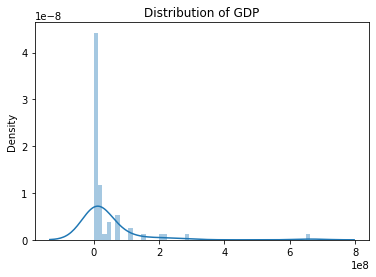

In [62]:
column_name = 'GDP'
plot_unique_value_distribution(df_after_new, column_name)

/Users/yiwei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


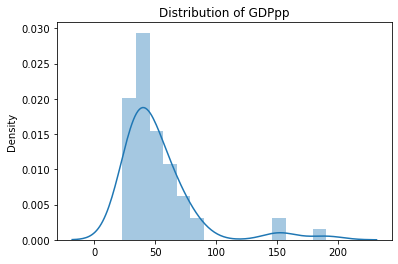

In [63]:
column_name = 'GDPpp'
plot_unique_value_distribution(df_after_new, column_name)

In [90]:
df_after_new[df_after_new['RegionName'] == 'Napa County']

,Unnamed: 0,RegionName,State_x,Date,Price,Housing Inventory,UnemploymentRate,cases,cases_rate,deaths,death_rate,fully_vaccinated,fully_vaccinated_rate,Population,Area,GDP,GDPpp
33,33,Napa County,CA,2020-02,691980.0,296.0,3.2,1.0,0.000007,0.0,0.000000,0.0,0.000000,136207,754,9870652,72.468023
90,91,Napa County,CA,2020-03,692462.0,346.0,3.7,34.0,0.000243,1.0,0.000007,0.0,0.000000,136207,754,9870652,72.468023
147,149,Napa County,CA,2020-04,696546.0,317.0,17.8,49.0,0.000351,1.0,0.000007,0.0,0.000000,136207,754,9870652,72.468023
204,207,Napa County,CA,2020-05,702526.0,411.0,15.2,65.0,0.000465,1.0,0.000007,0.0,0.000000,136207,754,9870652,72.468023
261,265,Napa County,CA,2020-06,703362.0,394.0,12.4,339.0,0.002427,1.0,0.000007,0.0,0.000000,136207,754,9870652,72.468023
318,323,Napa County,CA,2020-07,706206.0,384.0,10.7,692.0,0.004955,5.0,0.000036,0.0,0.000000,136207,754,9870652,72.468023
375,381,Napa County,CA,2020-08,710469.0,327.0,9.3,333.0,0.002384,3.0,0.000021,0.0,0.000000,136207,754,9870652,72.468023
432,439,Napa County,CA,2020-09,720507.0,322.0,8.3,266.0,0.001905,0.0,0.000000,0.0,0.000000,136207,754,9870652,72.468023
489,497,Napa County,CA,2020-10,733030.0,316.0,7.4,432.0,0.003093,3.0,0.000021,0.0,0.000000,136207,754,9870652,72.468023
546,555,Napa County,CA,2020-11,744631.0,311.0,6.4,1433.0,0.010261,3.0,0.000021,3.0,0.000021,136207,754,9870652,72.468023
